In [1]:
import os
import dask.dataframe as dd


#Takes path of directory and finds train.csv, test.csv or direct path of singular .csv file
#and returns list of dask dataframe [singular_df_x, singular_df_y] or [train_df_x, train_df_y, test_df_x, test_df_y]
class DataframeExtractor_csv:
    def __init__(self, directory_path, label_names = []):
        self._directory_path = directory_path
        self._label_names = label_names
        self._df_list = []
        self.get_df_list()
        
    @property
    def directory_path(self):
        return self._directory_path
    
    @property
    def labels(self):
        return self._labels
    
    @property
    def df_list(self):
        return self._df_list
    
    #returns list of dask dataframes
    def get_df_list(self):
        
        #If csv file path has been entered
        if self._directory_path.endswith(".csv"):
            print(f"Reading single csv from {self._directory_path}")
            csv_df = dd.read_csv(self._directory_path, assume_missing = True, sample_rows=1000)
            self._df_list.append(csv_df.loc[:, ~csv_df.columns.isin(self._label_names)])
            self._df_list.append(csv_df[self._label_names])
            
        elif self._no_of_csv(self._directory_path) == 1:
            csv_dir = self._get_csv_path(self._directory_path)
            self._check_dir_exists(csv_dir)
            csv_df = dd.read_csv(csv_dir, assume_missing = True, sample_rows=1000)
            self._df_list.append(csv_df.loc[:, ~csv_df.columns.isin(self._label_names)])
            self._df_list.append(csv_df[self._label_names])
            
        #Finding train.csv and test.csv from directory
        else:            
            print(f"Reading train.csv and test.csv of directory {self._directory_path}")
            
            train_dir = os.path.join(self._directory_path, "train.csv")
            self._check_dir_exists(train_dir)
            csv_df = dd.read_csv(train_dir, assume_missing = True, sample_rows=1000)
            self._df_list.append(csv_df.loc[:, ~csv_df.columns.isin(self._label_names)])
            self._df_list.append(csv_df[self._label_names])
            
            
            test_dir = os.path.join(self._directory_path, "test.csv")
            self._check_dir_exists(test_dir)
            csv_df = dd.read_csv(test_dir, assume_missing = True, sample_rows=1000)
            self._df_list.append(csv_df.loc[:, ~csv_df.columns.isin(self._label_names)])
            self._df_list.append(csv_df[self._label_names])

        
        #If no datasets are found
        if not self._df_list:
            raise EmptyListError("No Datasets found")
            
        
    @staticmethod
    def _check_dir_exists(directory):
        if(not os.path.isfile(directory)):
            raise FileNotFoundError(f"Directory {directory} does not exist")
            
    @staticmethod
    def _no_of_csv(directory):
        i = 0
        filenames = os.listdir(directory)
        for filename in filenames:
            if filename.endswith(".csv"):
                i = i+1
        return i
    @staticmethod
    def _get_csv_path(directory):
        filenames = os.listdir(directory)
        for filename in filenames:
            if filename.endswith(".csv"):
                return os.path.join(directory,filename)

In [2]:
directory = "/home/anish/ASC-ML-EXP-DATASETS/LinReg-tabular/weather-history-dataset/weatherHistory.csv"
dataset_list = DataframeExtractor_csv(directory, label_names = ["Temperature (C)"]).df_list

Reading single csv from /home/anish/ASC-ML-EXP-DATASETS/LinReg-tabular/weather-history-dataset/weatherHistory.csv


In [3]:
dataset_list[1].head()

,Temperature (C)
0,9.472222
1,9.355556
2,9.377778
3,8.288889
4,8.755556


In [4]:
dataset = dataset_list[0].copy()

In [5]:
dataset.head()

,Formatted Date,Summary,Precip Type,Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [6]:
dataset.compute().shape

(96453, 11)

In [7]:
dataset["Precip Type"].value_counts().compute()

rain    85224
snow    10712
Name: Precip Type, dtype: int64

In [8]:
dataset["Precip Type"].notnull().value_counts().compute()

True     95936
False      517
Name: Precip Type, dtype: int64

In [9]:
dataset["Summary"].value_counts().compute()

Partly Cloudy                          31733
Mostly Cloudy                          28094
Overcast                               16597
Clear                                  10890
Foggy                                   7148
Breezy and Overcast                      528
Breezy and Mostly Cloudy                 516
Breezy and Partly Cloudy                 386
Dry and Partly Cloudy                     86
Windy and Partly Cloudy                   67
Light Rain                                63
Breezy                                    54
Windy and Overcast                        45
Humid and Mostly Cloudy                   40
Drizzle                                   39
Windy and Mostly Cloudy                   35
Breezy and Foggy                          35
Dry                                       34
Humid and Partly Cloudy                   17
Dry and Mostly Cloudy                     14
Rain                                      10
Windy                                      8
Humid and 

In [10]:
import seaborn as sns

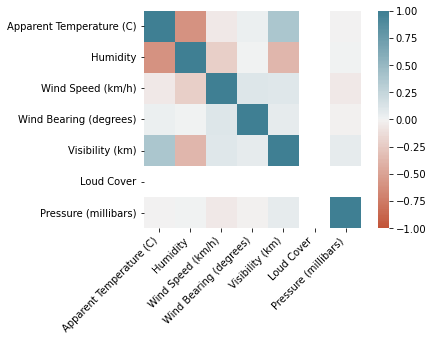

In [11]:
corr = dataset.corr().compute()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [22]:
dataset.head()

,Formatted Date,Summary,Precip Type,Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [39]:
def func(row):   
    if row['Precip Type'] == 'rain':
        return 1  
    elif row['Precip Type'] == 'snow':
        return 2
    else:
        return 0

dataset['PrecipNo'] = dataset.apply(func, axis=1)

/home/anish/anaconda3/envs/tfgpu/lib/python3.8/site-packages/dask/dataframe/core.py:5077: UserWarning: 
You did not provide metadata, so Dask is running your function on a small dataset to guess output types. It is possible that Dask will guess incorrectly.
To provide an explicit output types or to silence this message, please provide the `meta=` keyword, as described in the map or apply function that you are using.
  Before: .apply(func)
  After:  .apply(func, meta=(None, 'int64'))

  warnings.warn(meta_warning(meta))


In [40]:
dataset.head()

,Formatted Date,Summary,Precip Type,Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,PrecipNo
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,1
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,1
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,1
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,1
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,1


In [12]:
# dataset = dataset[dataset["Precip Type"].compute().notna()]

In [41]:
train_y = dataset[["Apparent Temperature (C)"]]
train_x = dataset.loc[:, ~dataset.columns.isin(["Apparent Temperature (C)"])]
train_x = train_x.drop(["Summary", "Precip Type", "Formatted Date", "Daily Summary", "Loud Cover"], axis=1).compute()

In [42]:
train_x.head()

,Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),PrecipNo
0,0.89,14.1197,251.0,15.8263,1015.13,1
1,0.86,14.2646,259.0,15.8263,1015.63,1
2,0.89,3.9284,204.0,14.9569,1015.94,1
3,0.83,14.1036,269.0,15.8263,1016.41,1
4,0.83,11.0446,259.0,15.8263,1016.51,1


In [43]:
train_y.head()

,Apparent Temperature (C)
0,7.388889
1,7.227778
2,9.377778
3,5.944444
4,6.977778


In [44]:
len(train_x)
len(train_y)

96453

In [45]:
len(train_x.columns)

6

In [97]:
import numpy as np
import tensorflow as tf
from sklearn import preprocessing
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Concatenate, Flatten, Input, Conv2D
from tensorflow.keras.activations import tanh
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

In [63]:
tf.keras.backend.clear_session()
# model = Sequential([
#     Dense(32, activation = "relu"),
#     Dense(100, activation = "relu"),
#     Dense(32, activation = "relu"),
#     Dense(4)
# ])

# model = Sequential([
#     Dense(32, activation = "tanh", input_shape = [6]),
#     Dense(32, activation = "tanh"),
#     Dense(1)
# ])

# input_layer = Input((5), name = "Input_Layer")
# x = Dense(32, activation = "tanh")(input_layer)
# x = Dense(32, activation = "tanh")(x)
# final_layer = Dense(1)(x)

# model = Model(inputs = [input_layer], outputs = [final_layer])

# model = Sequential([
#     Dense(16, activation = "relu"),
#     Dense(16, activation = "relu"),
#     Dense(4)
# ])
model = Sequential([
    Dense(64, activation = "relu", input_shape = [6]),
    Dense(256, activation = "relu"),
    Dense(128, activation = "relu"),
    Dense(32, activation = "relu"),
    Dense(1)
])

In [64]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                448       
_________________________________________________________________
dense_1 (Dense)              (None, 256)               16640     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 54,145
Trainable params: 54,145
Non-trainable params: 0
_________________________________________________________________


In [65]:
adam_optimizer = Adam(lr = 1e-3)
model.compile(loss = "mean_squared_error",
             optimizer = adam_optimizer,
             metrics = [tf.keras.metrics.MeanAbsoluteError(), "acc"])

In [66]:
# print(train_x.to_records())
# df.map_partitions(np.asarray)
# dask.array<asarray, shape=(nan, 4), dtype=object, chunksize=(nan, 4)>

# df.to_dask_array()

# df.values

# df.to_records()

In [67]:
train_x.values

array([[8.90000e-01, 1.41197e+01, 2.51000e+02, 1.58263e+01, 1.01513e+03,
        1.00000e+00],
       [8.60000e-01, 1.42646e+01, 2.59000e+02, 1.58263e+01, 1.01563e+03,
        1.00000e+00],
       [8.90000e-01, 3.92840e+00, 2.04000e+02, 1.49569e+01, 1.01594e+03,
        1.00000e+00],
       ...,
       [5.60000e-01, 8.98380e+00, 3.00000e+01, 1.61000e+01, 1.01566e+03,
        1.00000e+00],
       [6.00000e-01, 1.05294e+01, 2.00000e+01, 1.61000e+01, 1.01595e+03,
        1.00000e+00],
       [6.10000e-01, 5.87650e+00, 3.90000e+01, 1.55204e+01, 1.01616e+03,
        1.00000e+00]])

In [68]:
type(train_x.values)

numpy.ndarray

In [69]:
history = model.fit(np.array(train_x.values), np.array(train_y.values), epochs=80, batch_size=64)

Epoch 1/80
1508/1508 [==============================] - 2s 1ms/step - loss: 120.2957 - mean_absolute_error: 8.9949 - acc: 1.3518e-04
Epoch 2/80
1508/1508 [==============================] - 2s 1ms/step - loss: 88.6541 - mean_absolute_error: 7.6389 - acc: 3.8338e-04
Epoch 3/80
1508/1508 [==============================] - 2s 1ms/step - loss: 76.5140 - mean_absolute_error: 7.0525 - acc: 3.7562e-04
Epoch 4/80
1508/1508 [==============================] - 2s 1ms/step - loss: 60.8814 - mean_absolute_error: 6.2799 - acc: 7.6628e-04
Epoch 5/80
1508/1508 [==============================] - 2s 1ms/step - loss: 53.6040 - mean_absolute_error: 5.8901 - acc: 7.4068e-04
Epoch 6/80
1508/1508 [==============================] - 2s 1ms/step - loss: 51.1399 - mean_absolute_error: 5.7399 - acc: 6.7023e-04
Epoch 7/80
1508/1508 [==============================] - 2s 1ms/step - loss: 51.2970 - mean_absolute_error: 5.7627 - acc: 6.9011e-04
Epoch 8/80
1508/1508 [==============================] - 2s 1ms/step - loss:

In [71]:
print(history.history.keys())

dict_keys(['loss', 'mean_absolute_error', 'acc'])


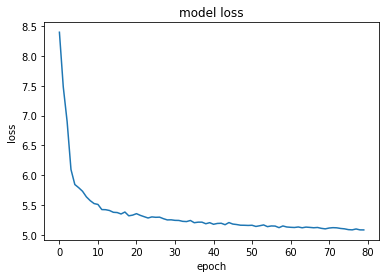

In [72]:
import matplotlib.pyplot as plt
# summarize history for loss
plt.plot(history.history['mean_absolute_error'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
plt.show()

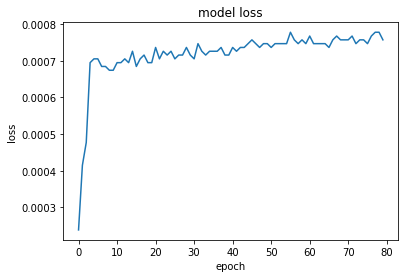

In [73]:
plt.plot(history.history['acc'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [95]:
model.predict(train_x[500:510])

array([[15.184239 ],
       [12.774906 ],
       [14.205779 ],
       [15.618802 ],
       [16.015747 ],
       [15.317501 ],
       [13.922018 ],
       [14.369669 ],
       [11.936341 ],
       [10.9504795]], dtype=float32)

In [96]:
train_y.compute()[500:510]

,Apparent Temperature (C)
500,16.261111
501,14.983333
502,14.466667
503,13.944444
504,12.316667
505,11.761111
506,10.827778
507,10.138889
508,10.627778
509,10.605556


In [ ]:
X_np_array = np.array(train_x.values)
Y_np_array = np.array(train_y.values)

In [ ]:
X_np_array

In [ ]:
history = model.fit(X_np_array, Y_np_array, epochs=150, batch_size=8)